In [336]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [337]:
np.random.seed(42)
m = 100
X = 7 * np.random.rand(m, 1) - 3
y = (1.5 * X ** 2) + (2 * X) + 3 + np.random.randn(100, 1)

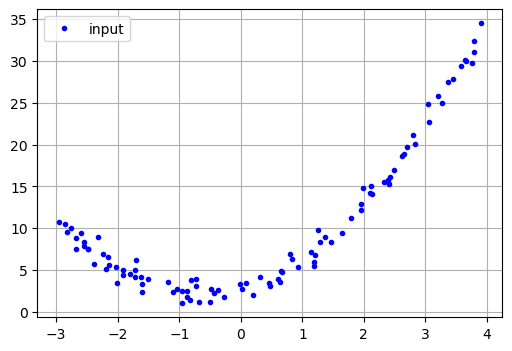

In [338]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, 'b.', label="input")
plt.legend()
plt.grid()

In [339]:
lr = LinearRegression()

In [376]:
lr.fit(X, y)

LinearRegression()

In [377]:
lr.coef_

array([[3.15519139]])

In [378]:
lr.intercept_

array([9.22940455])

In [593]:
class PolynomialRegression():
    def __init__(self, degree, learning_rate, epochs):
        self.degree = degree
        self.lr = learning_rate
        self.epochs = epochs
        self.coef_ = None
        self.intercept_ = 0

    def fit(self, X, y):
        X_new = np.linspace(X.min(), X.max(), X.shape[0]).reshape(X.shape[0], 1)
        poly_features = PolynomialFeatures(degree=2, include_bias=False)
        X_new_poly = poly_features.fit_transform(X_new) 
        self.coef_ = np.ones(self.degree)
        gradient_of_coef_ = np.zeros(self.degree)
        gradient_of_intercept_ = 0
        for i in range(self.epochs):
            y_pred = (self.coef_ @ X_new_poly.T) + self.intercept_
            for i in range(self.degree):
                gradient_of_coef_[i] = (-2/X.shape[0]) * np.sum((y - y_pred) @ X_new_poly.T[i])
                self.coef_[i] -= (self.lr * gradient_of_coef_[i])
            gradient_of_intercept_ = (-2/X.shape[0]) * np.sum(y - y_pred)
            self.intercept_ -= (self.lr * gradient_of_intercept_)
        return self

    def predict(self, X):
        return (self.coef_ @ X.T) + self.intercept_

In [684]:
pr = PolynomialRegression(2, 0.0000001, 15000)

In [685]:
pr.fit(X, y)

In [686]:
X_new = np.linspace(X.min(), X.max(), X.shape[0]).reshape(X.shape[0], 1)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_new_poly = poly_features.fit_transform(X_new) 

In [687]:
pr_pred = pr.predict(X_new_poly)

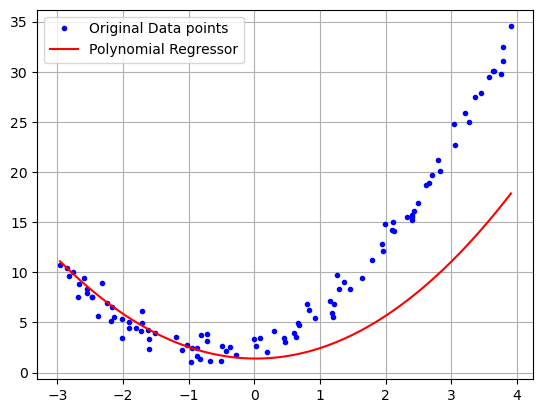

In [690]:
plt.plot(X, y, 'b.', label="Original Data points")
plt.plot(X_new, pr_pred, 'r-', label="Polynomial Regressor")
plt.legend()
plt.grid();
# We cannot get the best fit because the y original data points are shuffled as per original X's.